***1. Importing libraries and dataset***

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("Shape of train-images {0} and shape of train-labels {1}".format(train_images.shape, train_labels.shape))
print("Shape of test-images {0} and shape of test-labels {1}".format(test_images.shape, test_labels.shape))

Shape of train-images (60000, 28, 28) and shape of train-labels (60000,)
Shape of test-images (10000, 28, 28) and shape of test-labels (10000,)


***2. Display an image from the dataset***

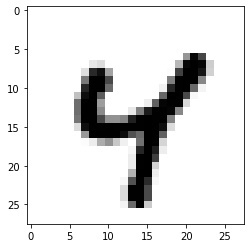

Corresponding label is 4


In [5]:
plt.imshow(train_images[1008], cmap='binary')
plt.show()
print("Corresponding label is {0}".format(train_labels[1008]))

In [11]:
print("Shape & dimension of training images dataset: ", train_images.shape, "and ", np.ndim(train_images))

Shape & dimension of training images dataset:  (60000, 28, 28) and  3


***3. Convert dataset into shape of (num of images, height, width, channel)***

In [12]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [13]:
print("Shape & dimension of training images dataset: ", train_images.shape, "and ", np.ndim(train_images))

Shape & dimension of training images dataset:  (60000, 28, 28, 1) and  4


***4. Define model architecture and then train***

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [15]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.1671 - accuracy: 0.9480
Epoch 2/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0473 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 52s 56ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0249 - accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 53s 56ms/step - loss: 0.0200 - accuracy: 0.9936


***5. Display original test data and corresponding prectiction***

Origianl test image of index 2:


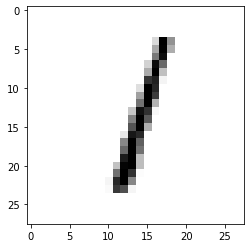

Predicted result is :  1


In [27]:
print("Origianl test image of index 2:")
plt.imshow(test_images[2:3][0, :,:,0], cmap='binary')
plt.show()

prediction = model.predict(test_images[2:3])
print("Predicted result is : ", np.argmax(prediction))